**Group 13**

**Predict NHL player Salaries**

 

1.   *Rajat Chaudhary* 
2.   *Mohd Jeeshan Sheikh*
3. *Pratyush Chaudhary*
4. *Rishabh Katiyar*
5. *Saket Arora*



In [708]:
import numpy as np 
import pandas as pd 

import os
import warnings
warnings.filterwarnings('ignore')
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [709]:
#Reading the data 
train = pd.read_csv('/content/drive/My Drive/train.csv',encoding = 'ISO-8859-1')
train.head()

,Salary,Born,City,Pr/St,Cntry,Nat,Ht,Wt,DftYr,DftRd,Ovrl,Hand,Last Name,First Name,Position,Team,GP,G,A,A1,A2,PTS,+/-,E+/-,PIM,Shifts,TOI,TOIX,TOI/GP,TOI/GP.1,TOI%,IPP%,SH%,SV%,PDO,F/60,A/60,Pct%,Diff,Diff/60,...,Min,Maj,Match,Misc,Game,CF,CA,FF,FA,SF,SA,xGF,xGA,SCF,SCA,GF,GA,RBF,RBA,RSF,RSA,DSF,DSA,FOW,FOL,HF,HA,GVA,TKA,PENT,PEND,OPS,DPS,PS,OTOI,Grit,DAP,Pace,GS,GS/G
0,925000,97-01-30,Sainte-Marie,QC,CAN,CAN,74,190,2015.0,1.0,18.0,L,Chabot,Thomas,D,OTT,1,0,0,0,0,0,-2,0.0,0,13,429,7.2,7.15,7.16,15.2,0.0,0.0,0.750,750.0,0.00,16.74,0.0,-2,-16.74,...,0,0,0,0,0,9.0,12.0,8.0,10.0,5.0,8.0,0.5,0.9,2.0,3.0,0.0,2.0,1.0,1.0,0.0,1.0,1,2,4.0,5.0,1.0,2.0,1.0,1.0,1.0,1.0,0.0,-0.2,-0.2,40.03,1,0.0,175.7,-0.4,-0.38
1,2250000,93-12-21,Ottawa,ON,CAN,CAN,74,207,2012.0,1.0,15.0,R,Ceci,Cody,D,OTT,79,2,15,6,9,17,-11,-10.4,20,2418,109992,1826.2,23.20,23.17,39.0,30.4,7.4,0.915,989.0,1.84,2.79,39.7,-29,-0.95,...,10,0,0,0,0,1433.0,1992.0,1038.0,1423.0,757.0,997.0,62.0,88.8,197.0,280.0,56.0,85.0,68.0,82.0,79.0,94.0,147,176,949.0,939.0,749.0,671.0,284.0,197.0,104.0,98.0,-0.2,3.4,3.2,2850.59,290,13.3,112.5,14.1,0.18
2,8000000,88-04-16,St. Paul,MN,USA,USA,72,218,2006.0,1.0,7.0,R,Okposo,Kyle,RW,BUF,65,19,26,13,13,45,-7,-1.4,24,1443,73983,1229.2,18.97,18.95,33.1,63.4,9.7,0.934,1031.0,3.47,1.95,64.0,31,1.51,...,12,0,0,0,0,1301.0,1051.0,986.0,826.0,734.0,606.0,70.8,46.4,235.0,133.0,71.0,40.0,60.0,34.0,76.0,52.0,136,86,739.0,600.0,340.0,351.0,168.0,129.0,56.0,70.0,3.7,1.3,5.0,2486.75,102,6.6,114.8,36.8,0.57
3,3500000,92-01-07,Ottawa,ON,CAN,CAN,77,220,2010.0,1.0,3.0,R,Gudbranson,Erik,D,VAN,30,1,5,5,0,6,-14,-5.3,18,765,36603,607.9,20.33,20.31,36.1,37.5,6.2,0.897,959.0,1.58,3.45,31.4,-19,-1.88,...,4,2,0,0,0,460.0,605.0,339.0,467.0,259.0,340.0,22.0,33.6,80.0,130.0,16.0,35.0,27.0,20.0,29.0,32.0,56,52,324.0,328.0,198.0,197.0,86.0,59.0,26.0,22.0,0.0,0.4,0.5,1074.41,130,17.5,105.1,5.9,0.20
4,1750000,94-03-29,Toronto,ON,CAN,CAN,76,217,2012.0,1.0,16.0,R,Wilson,Tom,RW,WSH,82,7,12,4,8,19,9,4.1,133,1453,63592,1059.7,12.93,12.93,23.5,61.3,7.8,0.917,995.0,1.76,2.32,43.1,-10,-0.57,...,33,9,0,1,1,766.0,992.0,546.0,720.0,398.0,495.0,33.5,47.5,124.0,159.0,31.0,41.0,30.0,37.0,43.0,53.0,73,90,528.0,490.0,512.0,422.0,157.0,126.0,88.0,68.0,-0.1,1.4,1.3,3459.09,425,8.3,99.5,21.8,0.27


In [710]:
#Missing values
print("\n\n Missing values per attribute : \n\n")

print(train.isna().sum())
print(train.isna().sum().sum())


#Splitting multiple valued attributes 

positions = []
for i in train['Position']:
    x = i.split("/")
    for y in x :
        positions.append(y)
positions = pd.unique(positions)
for pos in positions:
    train.loc[:,pos] = 0
for i in range(len(train['Position'])):
    x = train.loc[i,'Position'].split("/")
    for y in x:
        train.loc[i,y] = 1
teams = []
for i in train['Team']:
    x = i.split("/")
    for y in x :
        teams.append(y)
teams = pd.unique(teams)
for team in teams:
    train.loc[:,team] = 0
for i in range(len(train['Team'])):
    x = train.loc[i,'Team'].split("/")
    for y in x:
        train.loc[i,y] = 1
        

#Finding Birth year 

new = train['Born'].str.split("-", n = 1, expand = True) 
train["Birth_year"] = new[0]
        



 Missing values per attribute : 


Salary      0
Born        0
City        0
Pr/St     153
Cntry       0
         ... 
Grit        0
DAP         0
Pace        1
GS          1
GS/G        2
Length: 154, dtype: int64
579


In [711]:

cor_matrix = train.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]
df = train.drop(train[to_drop], axis=1)

#Attributes remaining after eliminating reducing

print("\n\n Attributes remaining after data reduction : \n\n")
print(df.shape)
print(df.columns[1:30])
print(df.columns[31:60])
print(df.columns[61:90])
print(df.columns[90:])

print("\n\n Missing valued attributes : \n\n")

print(df.columns[df.isnull().any()])




 Attributes remaining after data reduction : 


(612, 112)
Index(['Born', 'City', 'Pr/St', 'Cntry', 'Nat', 'Ht', 'Wt', 'DftYr', 'DftRd',
       'Hand', 'Last Name', 'First Name', 'Position', 'Team', 'GP', 'G', 'A',
       '+/-', 'E+/-', 'PIM', 'TOI/GP', 'IPP%', 'SH%', 'SV%', 'PDO', 'F/60',
       'A/60', 'Pct%', 'Diff'],
      dtype='object')
Index(['iCF', 'iRB', 'iRS', 'sDist', 'iHF', 'iHA', 'iHDf', 'iGVA', 'iTKA',
       'iBLK', 'BLK%', 'iFOW', 'FO%', '%FOT', 'OTG', '1G', 'GWG', 'ENG', 'PSG',
       'PSA', 'G.Bkhd', 'G.Dflct', 'G.Slap', 'G.Snap', 'G.Tip', 'G.Wrap',
       'CBar ', 'Post', 'Over'],
      dtype='object')
Index(['S.Dflct', 'S.Slap', 'S.Snap', 'S.Tip', 'S.Wrap', 'iPenD', 'iPenDf',
       'NPD', 'Maj', 'Match', 'Misc', 'Game', 'DPS', 'DAP', 'Pace', 'GS/G',
       'D', 'RW', 'LW', 'C', 'OTT', 'BUF', 'VAN', 'WSH', 'CHI', 'N.J', 'T.B',
       'ARI', 'MIN'],
      dtype='object')
Index(['CGY', 'FLA', 'PIT', 'EDM', 'NYR', 'TOR', 'STL', 'BOS', 'COL', 'PHI',
       'CAR', 'ANA

In [712]:
import matplotlib.pyplot as plt

In [713]:
#Addressing missing values of Nominal Province/States 
df['Pr/St'].fillna('EXT',inplace = True) 

#Addressing missing values of Numeric columns
df['GS/G'].fillna(df['GS/G'].mean(),inplace=True)
df['Pace'].fillna(df['Pace'].mean(),inplace=True)
df['DAP'].fillna(df['DAP'].mean(),inplace=True)
df['DPS'].fillna(df['DPS'].mean(),inplace=True)

Dyr = df['DftYr'].median(skipna = True)
df['DftYr'].fillna(Dyr,inplace= True) 

Drd = df['DftRd'].median(skipna = True)
df['DftRd'].fillna(Drd,inplace= True)

ipp = df['IPP%'].mean(skipna = True)
df['IPP%'].fillna(ipp,inplace = True)

colnames = list(df.columns[21:39])
for col in colnames:
    edit_ids = df[df[col].isnull()].index.to_list()
    mean_ids = df[col].mean()
    for i in edit_ids:
        df.loc[i,col]=mean_ids
df["BLK%"].fillna(df["BLK%"].mean(),inplace=True)
df["%FOT"].fillna(df["%FOT"].mean(),inplace=True)

In [714]:
df.info()
df.describe()
df.isnull().sum().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 612 entries, 0 to 611
Columns: 112 entries, Salary to Birth_year
dtypes: float64(26), int64(75), object(11)
memory usage: 535.6+ KB


0

In [715]:
#Finding pearsons coefficient

from scipy.stats import pearsonr
colnames=list(df.columns)
core=[]
al=[]
v=0
for col in colnames:
    if(df[col].dtype==df["Born"].dtype):
        continue
    v, _ = pearsonr(df[col],df['Salary'])
    al.append(v)
    if abs(v)<0.1:
        core.append(col)
print(core)

['Ht', 'SV%', 'A/60', 'sDist', 'iHDf', 'BLK%', 'FO%', '%FOT', 'PSG', 'iPenDf', 'NPD', 'Maj', 'Match', 'Misc', 'Game', 'DAP', 'D', 'RW', 'LW', 'C', 'OTT', 'BUF', 'VAN', 'WSH', 'CHI', 'N.J', 'T.B', 'ARI', 'MIN', 'CGY', 'FLA', 'PIT', 'EDM', 'NYR', 'TOR', 'STL', 'BOS', 'COL', 'PHI', 'CAR', 'ANA', 'MTL', 'NSH', 'DAL', 'L.A', 'DET', 'CBJ', 'NYI', 'S.J', 'WPG']


In [716]:
import seaborn as sns
df.drop(core,inplace=True,axis=1)
df.drop(['Diff/60'],inplace=True,axis=1)

In [717]:
df.describe()

,Salary,Wt,DftYr,DftRd,GP,G,A,+/-,E+/-,PIM,TOI/GP,IPP%,SH%,PDO,F/60,Pct%,Diff,iCF,iRB,iRS,iHF,iHA,iGVA,iTKA,iBLK,iFOW,OTG,1G,GWG,ENG,PSA,G.Bkhd,G.Dflct,G.Slap,G.Snap,G.Tip,G.Wrap,CBar,Post,Over,S.Bkhd,S.Dflct,S.Slap,S.Snap,S.Tip,S.Wrap,iPenD,DPS,Pace,GS/G
count,6.120000e+02,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.00000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000
mean,2.264509e+06,200.745098,2008.985294,2.588235,51.566993,7.743464,13.006536,-0.20915,0.128922,25.812092,15.098072,50.345008,7.833607,993.331148,2.287758,46.379085,1.988562,159.513245,6.021523,7.484452,63.321895,61.310116,24.034314,19.294118,41.578431,83.230392,0.218954,1.429739,1.334967,0.339869,0.050654,0.676471,0.214052,0.915033,1.217320,0.772876,0.071895,0.279412,1.410131,3.338235,6.857843,1.147059,14.959150,13.954248,4.228758,0.890523,8.944444,1.331046,108.858592,0.339082
std,2.236340e+06,14.952420,4.085195,1.832707,29.110441,8.629748,12.624371,10.04403,5.637044,24.478836,4.231593,25.807844,3.449225,51.297871,1.090214,17.879230,16.455511,126.412872,6.194174,6.969492,56.960801,42.293051,20.994672,17.142660,43.084609,187.997922,0.573073,1.915557,1.822002,0.756107,0.226804,1.233693,0.528963,1.604812,1.936849,1.314299,0.288448,0.617821,1.888919,3.572257,7.551745,2.111757,19.575444,15.092986,5.620860,1.597699,7.866117,1.386627,8.776328,0.295540
min,5.750000e+05,160.000000,1990.000000,1.000000,1.000000,0.000000,0.000000,-31.00000,-19.000000,0.000000,4.700000,0.000000,0.000000,500.000000,0.000000,0.000000,-44.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.200000,77.600000,-0.810000
25%,7.425000e+05,190.000000,2007.000000,1.000000,24.000000,1.000000,2.000000,-5.00000,-2.600000,8.000000,11.927500,34.850000,6.300000,978.000000,1.687500,39.050000,-6.000000,47.000000,1.000000,2.000000,20.000000,24.750000,5.750000,4.000000,9.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,3.000000,0.000000,0.000000,2.000000,0.200000,104.475000,0.147500
50%,9.250000e+05,200.000000,2010.000000,2.000000,63.500000,5.000000,9.000000,-0.50000,-0.300000,21.000000,14.975000,55.050000,8.050000,998.500000,2.300000,48.850000,0.000000,152.000000,4.000000,6.000000,51.000000,61.000000,20.000000,16.000000,28.000000,2.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,4.000000,0.000000,7.000000,10.000000,2.000000,0.000000,7.000000,1.000000,108.900000,0.310000
75%,3.500000e+06,210.000000,2012.000000,3.000000,78.000000,12.000000,20.000000,5.00000,2.800000,36.000000,18.050000,68.725000,9.600000,1017.000000,2.992500,56.825000,7.000000,235.250000,9.000000,11.000000,88.000000,90.000000,37.250000,30.000000,56.250000,39.000000,0.000000,2.000000,2.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,1.000000,0.000000,0.000000,2.000000,5.000000,11.000000,2.000000,20.000000,20.000000,7.000000,1.000000,14.000000,1.900000,113.900000,0.530000
max,1.380000e+07,265.000000,2016.000000,9.000000,82.000000,44.000000,63.000000,34.00000,20.300000,154.000000,27.150000,100.000000,40.000000,1257.000000,10.780000,100.000000,61.000000,624.000000,41.000000,35.000000,364.000000,215.000000,106.000000,96.000000,213.000000,1089.000000,5.000000,14.000000,9.000000,4

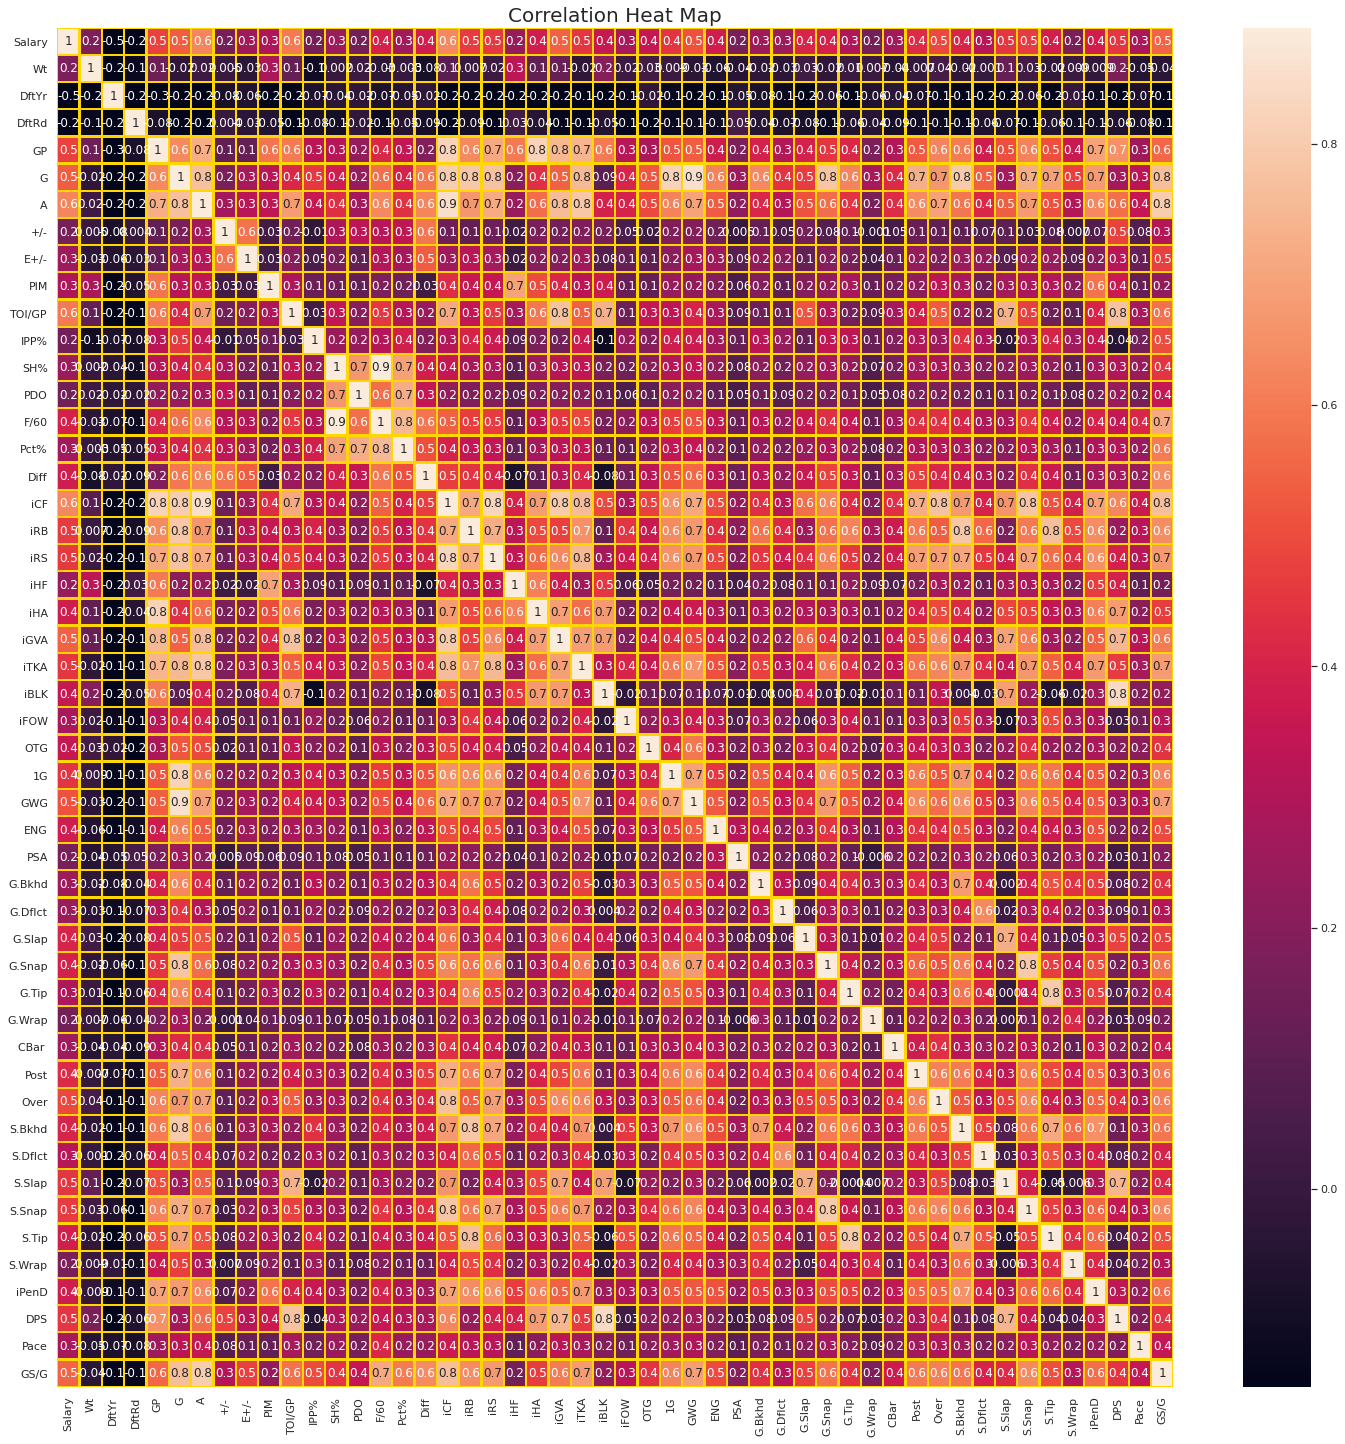

In [718]:
cor=df.corr()
plt.figure(figsize=(25,25))
sns.heatmap(cor,robust=True,fmt='.1g',linewidths=1.3,linecolor = 'gold', annot=True)
plt.title('Correlation Heat Map',size = 20)
plt.show()


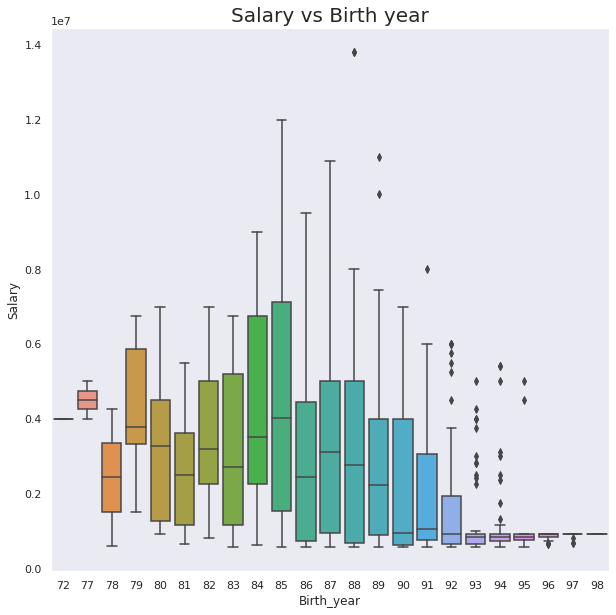

In [719]:
plt.figure(figsize=(10,10))
sns.set(style = 'dark',palette='colorblind')
df['Birth_year'] = df['Birth_year'].astype(int)
sns.boxplot(x="Birth_year",y="Salary",data = df)
plt.title('Salary vs Birth year',size = 20)
plt.show()

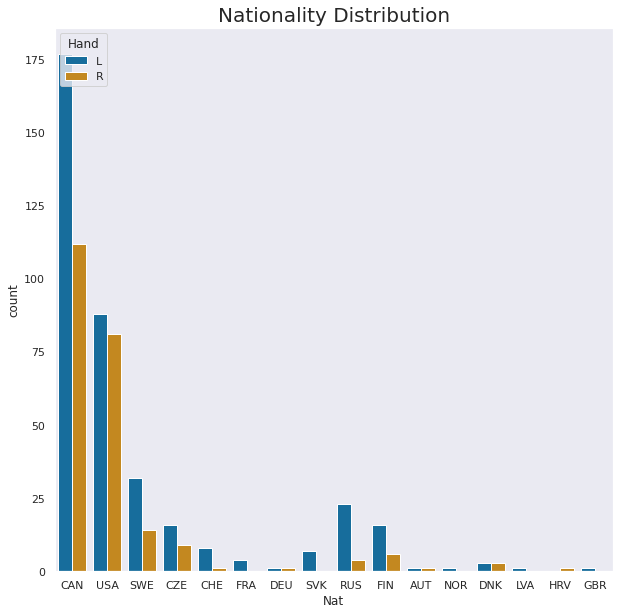

In [720]:
plt.figure(figsize=(10,10))
sns.countplot(x="Nat",hue="Hand",data = df)
plt.title('Nationality Distribution',size = 20)
plt.show()

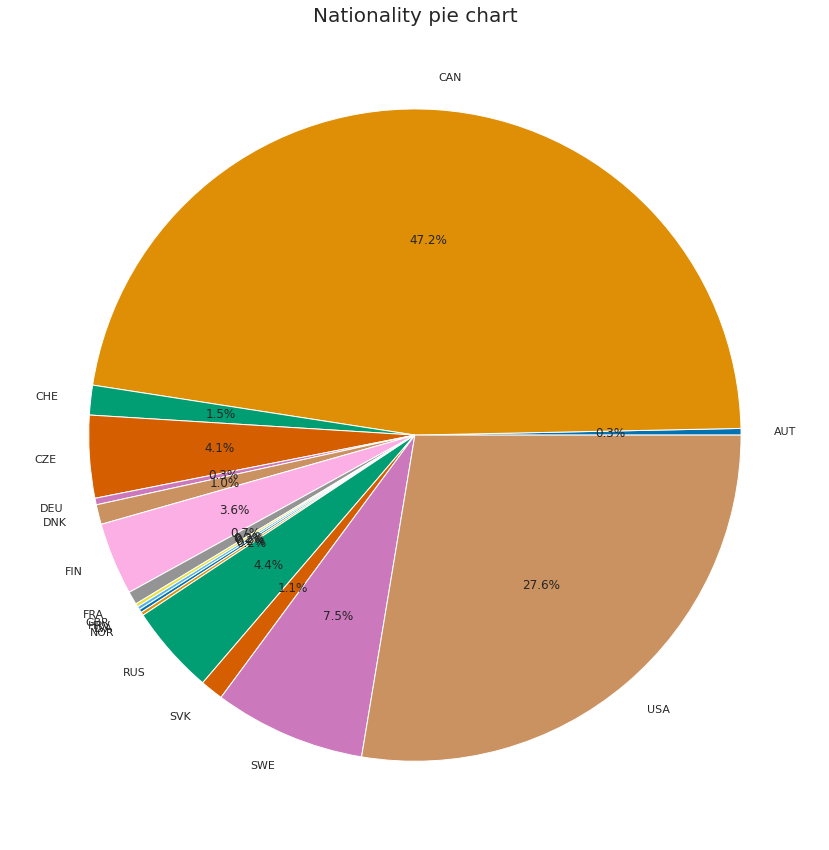

In [721]:
nat = df.groupby("Nat")["Nat"].count()
plt.figure(figsize=(15,15))

plt.pie(x=nat,autopct="%0.1f%%",labels = nat.index)
plt.title('Nationality pie chart',size = 20)
plt.show()

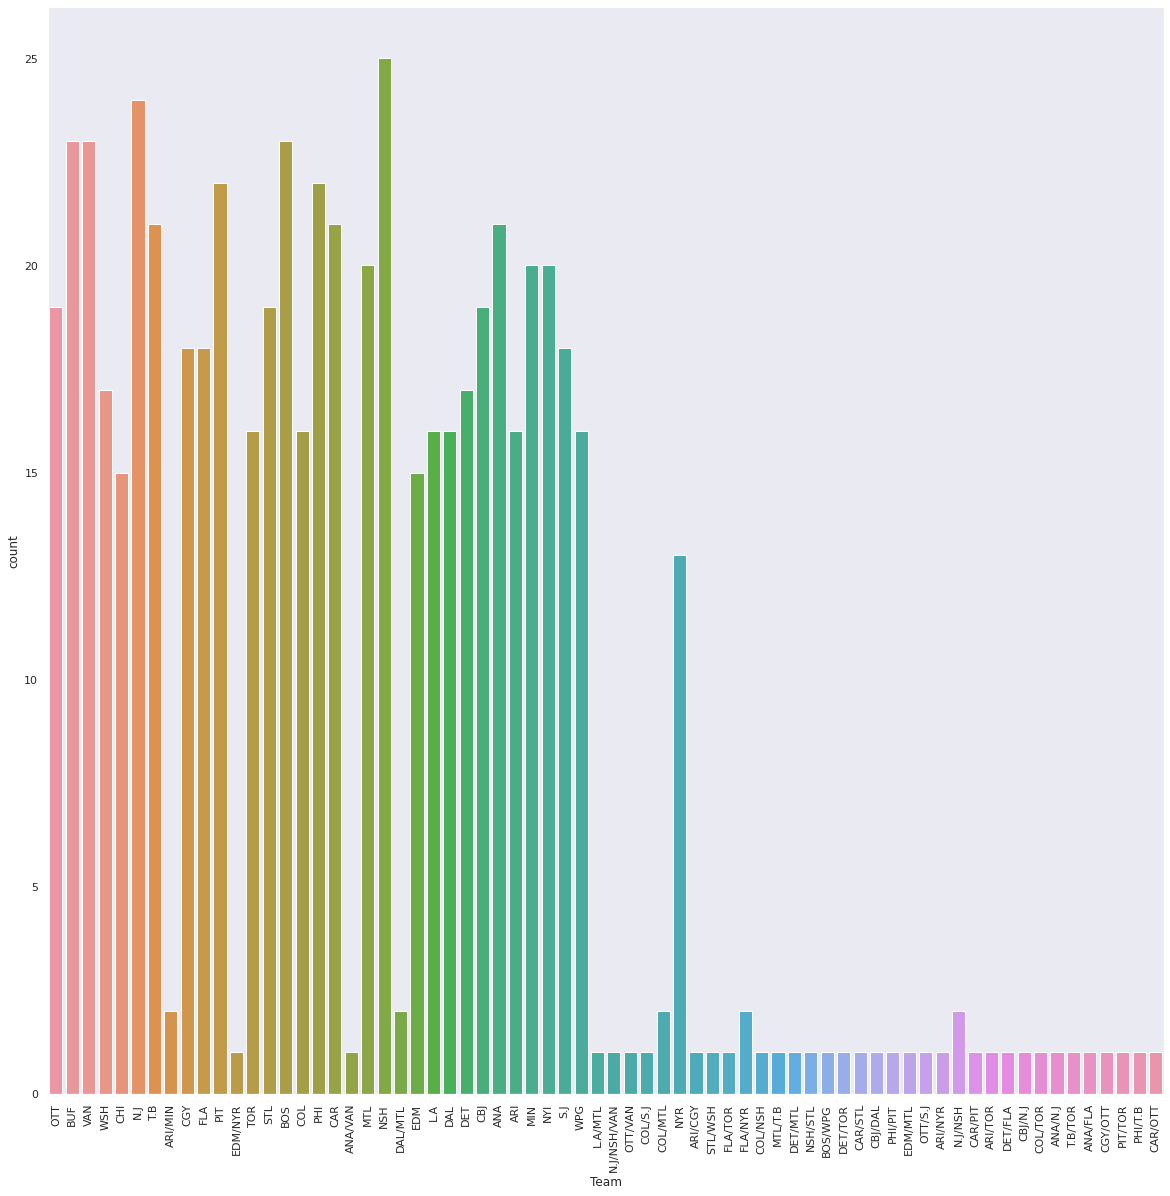

In [722]:
plt.figure(figsize=(20,20))
g = sns.countplot(x='Team',data = df)
g.set_xticklabels(rotation=90,labels = pd.unique(df["Team"]))
plt.show()

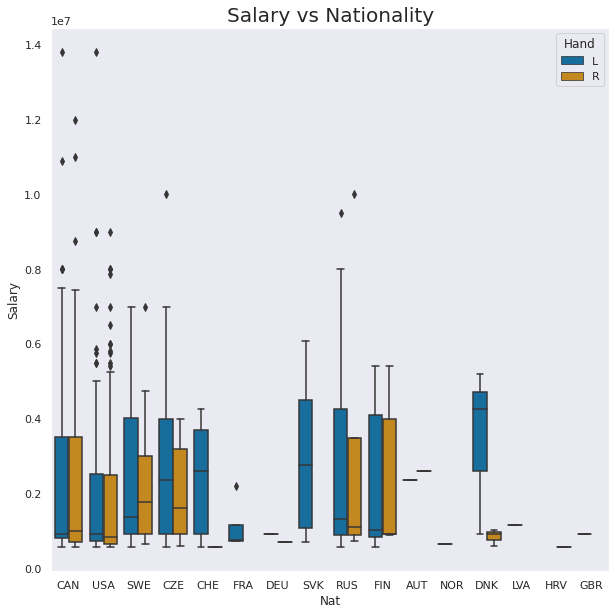

In [723]:
plt.figure(figsize=(10,10))
sns.boxplot(x="Nat",hue="Hand",y="Salary",data = df)
plt.title('Salary vs Nationality',size = 20)
plt.show()

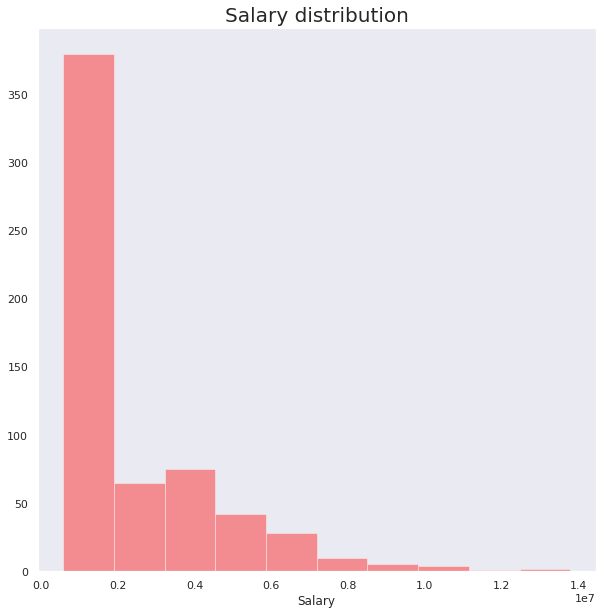

In [724]:
plt.figure(figsize=(10,10))
x = df['Salary']
sns.distplot(x,kde = False ,bins =10,color = 'red' )
plt.title('Salary distribution',size = 20)
plt.show()

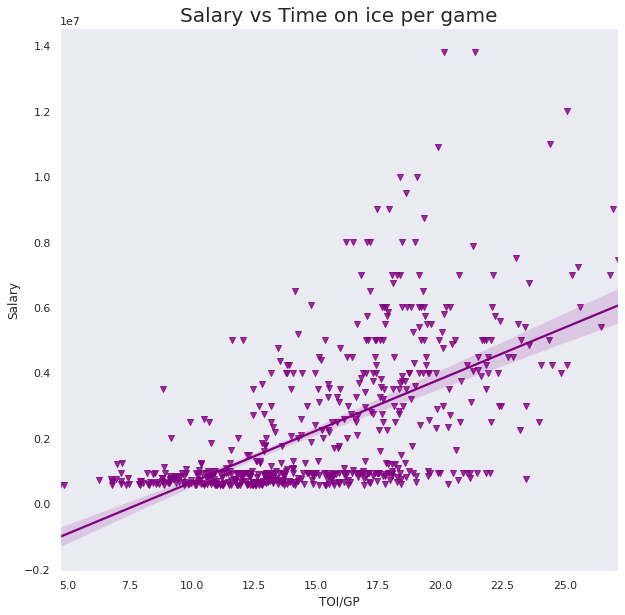

In [725]:
plt.figure(figsize=(10,10))
sns.regplot(x="TOI/GP",y="Salary",data = df,color = 'purple',marker = 'v')
plt.title('Salary vs Time on ice per game',size = 20)
plt.show()

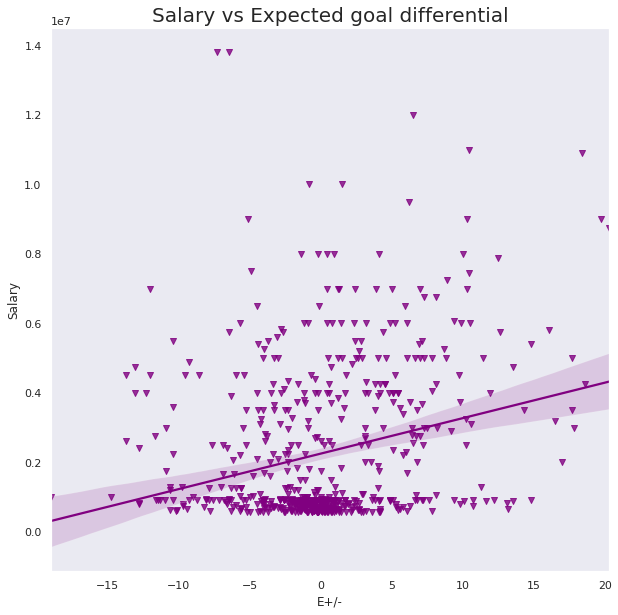

In [726]:
plt.figure(figsize=(10,10))
sns.regplot(x="E+/-",y="Salary",data = train,color = 'purple',marker = 'v')
plt.title('Salary vs Expected goal differential',size = 20)
plt.show()

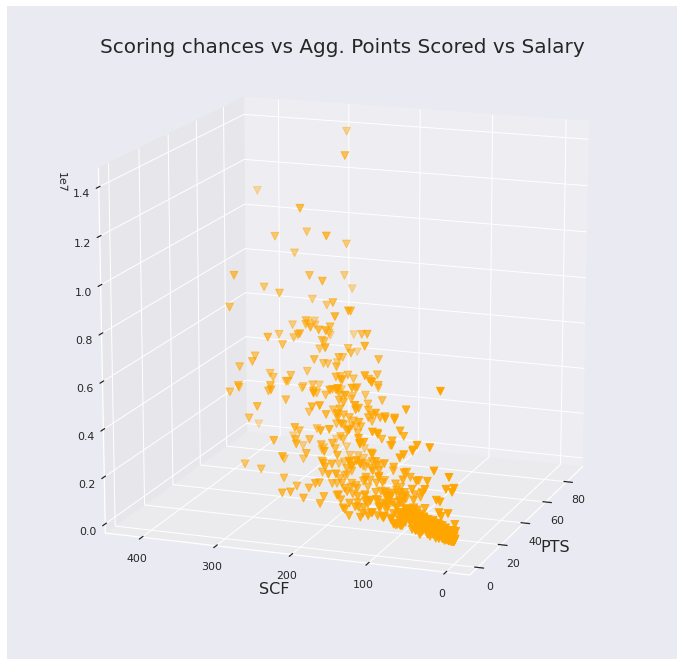

In [727]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(train['PTS'], train['SCF'], train['Salary'], c='orange', s=60,marker='v')
ax.view_init(15, 200)
plt.xlabel('PTS',fontsize = 16)
plt.ylabel('SCF',fontsize = 16)
plt.title('Scoring chances vs Agg. Points Scored vs Salary', size = 20)

plt.show()

# **Normalizing the DATA** 

In [728]:
df.set_index(['Last Name','First Name'])
df1 = df.select_dtypes('float64')
df2 = df.select_dtypes('int64')
df3=df.drop(df1,axis=1)
df4=df3.drop(df2,axis=1)
Y=df.Salary
df4['Name']=df4['Last Name']+' '+df4['First Name']

In [729]:
from sklearn.preprocessing import MinMaxScaler
df1=df1.copy()
df2=df2.copy()
scaler = MinMaxScaler() 
scaled_values = scaler.fit_transform(df1) 
df1.loc[:,:] = scaled_values
scaler_ = MinMaxScaler() 
scaled_values = scaler_.fit_transform(df2) 
df2.loc[:,:] = scaled_values

In [730]:
df3=df4.join(df2)
df=df3.join(df1)
df=df.drop('Salary',axis=1)

In [731]:
df[df['Cntry']!=df['Nat']]

,Born,City,Pr/St,Cntry,Nat,Hand,Last Name,First Name,Position,Team,Name,Wt,GP,G,A,+/-,PIM,Diff,iHF,iGVA,iTKA,iBLK,iFOW,OTG,1G,GWG,ENG,PSA,G.Bkhd,G.Dflct,G.Slap,G.Snap,G.Tip,G.Wrap,CBar,Post,Over,S.Bkhd,S.Dflct,S.Slap,S.Snap,S.Tip,S.Wrap,iPenD,Birth_year,DftYr,DftRd,E+/-,TOI/GP,IPP%,SH%,PDO,F/60,Pct%,iCF,iRB,iRS,iHA,DPS,Pace,GS/G
22,96-05-01,Calgary,AB,CAN,SWE,R,Nylander,William,C/RW,TOR,Nylander William,0.285714,0.987654,0.500000,0.619048,0.430769,0.207792,0.704762,0.068681,0.283019,0.614583,0.075117,0.044995,0.0,0.071429,0.222222,0.25,0.0,0.1,0.00,0.083333,0.461538,0.111111,0.0,0.000000,0.416667,0.684211,0.181818,0.055556,0.078014,0.785714,0.292683,0.2,0.127660,0.923077,0.923077,0.000,0.666667,0.499777,0.824,0.2275,0.685601,0.319109,0.627,0.578526,0.146341,0.600000,0.285163,0.175676,0.448522,0.753623
92,91-10-07,Hinsdale,IL,USA,CAN,R,Manson,Josh,D,ANA,Manson Josh,0.523810,1.000000,0.113636,0.190476,0.692308,0.532468,0.419048,0.623626,0.537736,0.239583,0.370892,0.000000,0.0,0.071429,0.111111,0.00,0.0,0.1,0.00,0.000000,0.153846,0.111111,0.0,0.000000,0.083333,0.157895,0.022727,0.000000,0.127660,0.102041,0.073171,0.2,0.319149,0.730769,0.807692,0.625,0.816794,0.620490,0.288,0.2125,0.667107,0.215213,0.500,0.290064,0.097561,0.342857,0.576744,0.662162,0.296636,0.550725
176,87-01-23,Narva,EXT,EST,FIN,L,Komarov,Leo,C/LW,TOR,Komarov Leo,0.476190,1.000000,0.318182,0.285714,0.569231,0.201299,0.561905,0.637363,0.235849,0.479167,0.234742,0.083563,0.0,0.214286,0.111111,0.00,0.0,0.2,0.00,0.000000,0.230769,0.555556,0.0,0.000000,0.083333,0.105263,0.295455,0.000000,0.063830,0.346939,0.512195,0.0,0.340426,0.576923,0.615385,0.625,0.424936,0.546548,0.400,0.2900,0.697490,0.319109,0.552,0.283654,0.146341,0.200000,0.288372,0.243243,0.413863,0.570048
195,94-11-30,Eisenstadt,EXT,AUT,SVK,L,Dano,Marko,C/LW/RW,WPG,Dano Marko,0.495238,0.456790,0.090909,0.111111,0.476923,0.064935,0.485714,0.228022,0.094340,0.187500,0.065728,0.000918,0.0,0.000000,0.000000,0.00,0.0,0.0,0.25,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.157895,0.181818,0.111111,0.028369,0.030612,0.024390,0.1,0.191489,0.846154,0.884615,0.000,0.488550,0.266370,0.733,0.1925,0.697490,0.205937,0.652,0.123397,0.121951,0.228571,0.181395,0.081081,0.244648,0.531401
201,92-12-07,Phoenix,AZ,USA,CAN,L,Couturier,Sean,C,PHI,Couturier Sean,0.485714,0.802469,0.318182,0.317460,0.661538,0.214286,0.428571,0.112637,0.311321,0.479167,0.164319,0.539027,0.0,0.214286,0.222222,0.25,0.0,0.3,0.25,0.000000,0.307692,0.111111,0.0,0.166667,0.166667,0.052632,0.340909,0.166667,0.042553,0.275510,0.170732,0.0,0.191489,0.769231,0.807692,0.000,0.732824,0.612472,0.607,0.2125,0.640687,0.256030,0.505,0.310897,0.390244,0.371429,0.530233,0.297297,0.321101,0.705314
233,95-02-09,Klagenfurt,EXT,AUT,SWE,L,Burakovsky,Andre,LW/C,WSH,Burakovsky Andre,0.428571,0.777778,0.272727,0.365079,0.676923,0.090909,0.619048,0.085165,0.311321,0.343750,0.117371,0.001837,0.0,0.428571,0.111111,0.00,0.0,0.0,0.00,0.000000,0.153846,0.111111,0.0,0.000000,0.250000,0.210526,0.068182,0.055556,0.035461,0.183673,0.073171,0.0,0.106383,0.884615,0.884615,0.000,0.483461,0.381737,0.795,0.2325,0.700132,0.288497,0.657,0.355769,0.170732,0.571429,0.367442,0.216216,0.382263,0.705314
268,85-12-27,Quebec City,QC,CAN,USA,L,Stastny,Paul,C,STL,Stastny Paul,0.400000,0.802469,0.409091,0.349206,0.538462,0.233766,0.590476,0.140110,0.084906,0.250000,0.164319,0.721763,0.0,0.214286,0.555556,0.00,0.0,0.1,0.25,0.000000,0.000000,0.666667,0.0,0.000000,0.333333,0.052632,0.340909,0.166667,0.007092,0.091837,0.365854,0.1,0.106383,0.500000,0.576923,0.125,0.513995,0.642762,0.580,0.2725,0.684280,0.304267,0.575,0.275641,0.292683,0.142857,0.172093,0.256757,0.292559,0.690821
285,87-04-27,Thunder Bay,ON,CAN,USA,L,Chorney,Taylor,D,WSH,Chorney Taylor,0.295238,0.209877,0.022727,0.063492,0.600000,0.071429,0.476190,0.074176,0.066038,0.031250,0.136150,0.000000,0.0,0.000000,0.111111,0.00,0.0,0.0,0.00,0.083333,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.049645,0.030612,0.000000,0.0

In [732]:
df.drop(['Cntry','Born','First Name','Last Name'],axis = 'columns',inplace = True)


In [733]:
dff=df

In [734]:
col=df.columns

In [735]:
y_valid

493    1250000
472     750000
107     925000
558    1650000
535    2250000
        ...   
587    7000000
42     2200000
334     575000
305     900000
81     3400000
Name: Salary, Length: 184, dtype: int64

# **Modelling**

In [736]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor 
from sklearn.linear_model import LogisticRegression
from sklearn.kernel_approximation import Nystroem
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb
from sklearn import model_selection, preprocessing
from lightgbm import LGBMRegressor
from sklearn.preprocessing import LabelEncoder

import tensorflow.keras as keras
import tensorflow as tf
from keras import backend as K

In [737]:
from sklearn import datasets, linear_model, metrics
# splitting X and y into training and testing sets 
from sklearn.model_selection import train_test_split 

X_train, X_val, y_train, y_valid = train_test_split(df, Y, test_size=0.3, random_state=1)

In [738]:
s = (X_train.dtypes == 'object')
object_cols = list(s[s].index)

In [739]:
from sklearn.preprocessing import OneHotEncoder

# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train[object_cols]))
OH_cols_valid = pd.DataFrame(OH_encoder.transform(X_val[object_cols]))

# One-hot encoding removed index; put it back
OH_cols_train.index = X_train.index
OH_cols_valid.index = X_val.index

# Remove categorical columns (will replace with one-hot encoding)
X_train = X_train.drop(object_cols, axis=1)
X_valid = X_val.drop(object_cols, axis=1)

# # Add one-hot encoded columns to numerical features
# X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
# X_valid = pd.concat([num_X_valid, OH_cols_valid], axis=1)

In [740]:
X_train

,Wt,GP,G,A,+/-,PIM,Diff,iHF,iGVA,iTKA,iBLK,iFOW,OTG,1G,GWG,ENG,PSA,G.Bkhd,G.Dflct,G.Slap,G.Snap,G.Tip,G.Wrap,CBar,Post,Over,S.Bkhd,S.Dflct,S.Slap,S.Snap,S.Tip,S.Wrap,iPenD,Birth_year,DftYr,DftRd,E+/-,TOI/GP,IPP%,SH%,PDO,F/60,Pct%,iCF,iRB,iRS,iHA,DPS,Pace,GS/G
133,0.285714,0.037037,0.000000,0.000000,0.430769,0.025974,0.380952,0.010989,0.009434,0.000000,0.004695,0.009183,0.0,0.000000,0.000000,0.00,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.021277,0.807692,0.769231,0.125,0.465649,0.244098,0.000,0.0000,0.430647,0.000000,0.000,0.008013,0.000000,0.000000,0.037209,0.013514,0.078491,0.299517
277,0.619048,0.950617,0.227273,0.301587,0.446154,0.194805,0.380952,0.167582,0.490566,0.354167,0.262911,0.204775,0.0,0.214286,0.222222,0.00,0.0,0.0,0.5,0.083333,0.076923,0.333333,0.0,0.0,0.333333,0.263158,0.181818,0.777778,0.092199,0.112245,0.268293,0.1,0.212766,0.307692,0.769231,0.125,0.432570,0.495768,0.659,0.2000,0.655218,0.198516,0.478,0.333333,0.268293,0.285714,0.432558,0.229730,0.374108,0.574879
481,0.285714,0.827160,0.136364,0.238095,0.569231,0.103896,0.380952,0.271978,0.198113,0.302083,0.206573,0.015611,0.0,0.000000,0.111111,0.00,0.0,0.0,0.0,0.000000,0.076923,0.444444,0.0,0.0,0.083333,0.157895,0.022727,0.000000,0.007092,0.061224,0.365854,0.2,0.148936,0.730769,0.769231,0.625,0.458015,0.405345,0.583,0.2375,0.675033,0.214286,0.474,0.161859,0.121951,0.114286,0.441860,0.175676,0.276249,0.526570
161,0.438095,0.160494,0.068182,0.015873,0.492308,0.038961,0.447619,0.032967,0.009434,0.010417,0.004695,0.000918,0.0,0.071429,0.000000,0.00,0.0,0.1,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.022727,0.000000,0.014184,0.000000,0.024390,0.0,0.000000,0.884615,0.884615,0.250,0.447837,0.201782,0.667,0.2725,0.751651,0.258813,0.667,0.033654,0.024390,0.000000,0.037209,0.054054,0.269113,0.478261
361,0.333333,0.864198,0.204545,0.317460,0.476923,0.233766,0.457143,0.593407,0.264151,0.260417,0.131455,0.002755,0.0,0.071429,0.333333,0.25,0.0,0.1,0.0,0.000000,0.230769,0.000000,0.0,0.0,0.083333,0.210526,0.272727,0.000000,0.092199,0.265306,0.121951,0.0,0.255319,0.269231,0.769231,0.125,0.524173,0.481960,0.630,0.1850,0.663144,0.232839,0.523,0.352564,0.390244,0.228571,0.530233,0.135135,0.389399,0.594203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,0.342857,0.283951,0.022727,0.015873,0.415385,0.168831,0.361905,0.126374,0.122642,0.031250,0.056338,0.000000,0.0,0.000000,0.000000,0.00,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.083333,0.052632,0.000000,0.000000,0.042553,0.000000,0.000000,0.0,0.021277,0.615385,0.692308,0.750,0.351145,0.475724,0.154,0.2175,0.660502,0.195733,0.406,0.078526,0.024390,0.057143,0.097674,0.094595,0.286442,0.376812
144,0.095238,0.074074,0.000000,0.015873,0.430769,0.038961,0.400000,0.008242,0.028302,0.020833,0.056338,0.000000,0.0,0.000000,0.000000,0.00,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.035461,0.010204,0.000000,0.0,0.000000,0.692308,0.692308,0.375,0.458015,0.491314,0.200,0.1925,0.622193,0.254174,0.417,0.049679,0.000000,0.028571,0.013953,0.013514,0.525994,0.507246
72,0.238095,0.666667,0.181818,0.190476,0.615385,0.142857,0.552381,0.052198,0.254717,0.166667,0.065728,0.001837,0.2,0.142857,0.222222,0.00,0.0,0.0,0.0,0.083333,0.153846,0.000000,0.0,0.0,0.083333,0.421053,0.090909,0.277778,0.070922,0.122449,0.024390,0.2,0.148936,0.884615,0.923077,0.625,0.455471,0.400000,0.571,0.2375,0.698811,0.258813,0.625,0.238782,0.243902,0.314286,0.288372,0.202703,0.364934,0.565217
235,0.476190,0.716049,0.113636,0.015873,0.430769,0.941558,0.390476,0.412088,0.018868,0.041667,0.065728,0.000000,0.0,0.142857,0.000000,0.00,0.0,0.0,0.0,0.000000,0.000000,0.222222,0.0,0.0,0.000000,0.052632,0.136364,0.000000,0.007092,0.020408,0.097561,0.1,0.148936,0.461538,0.769231,0.125,0.340967,0.110022,0

In [741]:
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

from sklearn.linear_model import LinearRegression
pca = PCA(n_components=60)

In [742]:
X_valid

,Wt,GP,G,A,+/-,PIM,Diff,iHF,iGVA,iTKA,iBLK,iFOW,OTG,1G,GWG,ENG,PSA,G.Bkhd,G.Dflct,G.Slap,G.Snap,G.Tip,G.Wrap,CBar,Post,Over,S.Bkhd,S.Dflct,S.Slap,S.Snap,S.Tip,S.Wrap,iPenD,Birth_year,DftYr,DftRd,E+/-,TOI/GP,IPP%,SH%,PDO,F/60,Pct%,iCF,iRB,iRS,iHA,DPS,Pace,GS/G
493,0.380952,1.000000,0.090909,0.206349,0.476923,0.064935,0.228571,0.197802,0.339623,0.322917,0.464789,0.000000,0.0,0.000000,0.000000,0.00,0.0,0.0,0.00,0.083333,0.000000,0.111111,0.0,0.000000,0.000000,0.263158,0.022727,0.055556,0.226950,0.132653,0.024390,0.0,0.106383,0.769231,0.769231,0.000,0.340967,0.617817,0.347,0.1925,0.652576,0.179963,0.415,0.275641,0.073171,0.085714,0.358140,0.540541,0.241590,0.531401
472,0.133333,0.913580,0.681818,0.333333,0.153846,0.246753,0.476190,0.288462,0.433962,0.666667,0.079812,0.112029,0.2,0.428571,0.666667,0.25,0.0,0.2,0.00,0.500000,0.538462,0.222222,0.0,0.000000,0.500000,0.157895,0.227273,0.111111,0.375887,0.397959,0.219512,0.4,0.404255,0.692308,0.769231,0.125,0.236641,0.544321,0.739,0.2250,0.642008,0.303340,0.523,0.504808,0.195122,0.542857,0.413953,0.135135,0.341488,0.714976
107,0.400000,0.925926,0.295455,0.555556,0.692308,0.681818,0.723810,0.178571,0.254717,0.416667,0.103286,0.007346,0.0,0.000000,0.222222,0.25,0.0,0.2,0.00,0.000000,0.000000,0.666667,0.0,0.166667,0.416667,0.263158,0.340909,0.111111,0.028369,0.091837,0.487805,0.1,1.000000,0.961538,1.000000,0.000,0.664122,0.444098,0.696,0.2575,0.684280,0.346011,0.651,0.371795,0.341463,0.400000,0.376744,0.283784,0.366972,0.753623
558,0.514286,0.975309,0.250000,0.365079,0.676923,0.227273,0.466667,0.450549,0.575472,0.239583,0.413146,0.000000,0.2,0.142857,0.222222,0.00,0.0,0.0,0.00,0.333333,0.076923,0.000000,0.5,0.000000,0.166667,0.263158,0.045455,0.000000,0.205674,0.163265,0.000000,0.1,0.191489,0.576923,0.769231,0.125,0.307888,0.709131,0.430,0.2700,0.689564,0.267161,0.516,0.360577,0.170732,0.171429,0.655814,0.554054,0.302752,0.550725
535,0.647619,0.975309,0.295455,0.158730,0.461538,0.474026,0.380952,0.766484,0.330189,0.343750,0.267606,0.000918,0.0,0.142857,0.000000,0.50,0.0,0.3,0.00,0.083333,0.000000,0.000000,0.0,0.000000,0.166667,0.368421,0.272727,0.166667,0.035461,0.153061,0.121951,0.2,0.468085,0.730769,0.730769,0.375,0.419847,0.479733,0.561,0.1850,0.671070,0.184601,0.477,0.280449,0.121951,0.342857,0.418605,0.229730,0.319062,0.512077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
587,0.428571,0.975309,0.318182,0.539683,0.523077,0.155844,0.561905,0.104396,0.254717,0.552083,0.741784,0.000000,0.0,0.142857,0.444444,0.25,0.0,0.1,0.00,0.250000,0.076923,0.111111,0.0,0.166667,0.083333,0.421053,0.113636,0.000000,0.432624,0.193878,0.024390,0.1,0.148936,0.692308,0.692308,0.000,0.582697,0.916704,0.457,0.2675,0.684280,0.290353,0.538,0.536859,0.146341,0.228571,0.604651,0.675676,0.313965,0.729469
42,0.380952,0.728395,0.272727,0.238095,0.492308,0.746753,0.352381,0.189560,0.349057,0.166667,0.211268,0.006428,0.0,0.000000,0.333333,0.25,0.0,0.2,0.00,0.000000,0.076923,0.222222,0.0,0.166667,0.000000,0.210526,0.250000,0.055556,0.028369,0.102041,0.121951,0.4,0.510638,0.653846,0.769231,0.125,0.631043,0.481960,0.614,0.2450,0.643329,0.263451,0.463,0.259615,0.097561,0.028571,0.469767,0.162162,0.395515,0.657005
334,0.380952,0.703704,0.181818,0.031746,0.646154,0.077922,0.476190,0.285714,0.103774,0.125000,0.112676,0.176309,0.0,0.142857,0.111111,0.25,0.0,0.1,0.00,0.000000,0.076923,0.111111,0.0,0.000000,0.000000,0.105263,0.136364,0.055556,0.028369,0.020408,0.097561,0.1,0.106383,0.807692,0.846154,0.125,0.419847,0.285969,0.417,0.2400,0.715984,0.206865,0.571,0.116987,0.121951,0.085714,0.269767,0.175676,0.257900,0.449275
305,0.076190,0.024691,0.000000,0.031746,0.430769,0.000000,0.400000,0.000000,0.000000,0.010417,0.000000,0.000000,0.0,0.000000,0.000000,0.00,0.0,0.0,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.

In [743]:
# X_train = pca.fit_transform(scale(X_train))
# X_valid = pca.fit_transform(scale(X_valid))

In [744]:
X_valid.shape

(184, 50)

In [745]:
# from sklearn.datasets import make_regression
# from xgboost import XGBRegressor
# from matplotlib import pyplot
# y_train=y_train
# y_valid=y_valid
# # define dataset
# model = XGBRegressor()
# # fit the model
# model.fit(X_train, y_train)
# # get importance
# col=X_train.columns
# importance = model.feature_importances_
# # summarize feature importance
# importance=pd.DataFrame(importance,index=col)

In [746]:
# importance.sort_values(by=0,ascending=False)


In [747]:
# final=importance[importance[0]>0.008]

In [748]:
# features=list(final.index)
# features

In [749]:
# X_train=X_train[features]
# X_valid=X_valid[features]

In [751]:

lr = LinearRegression()
lr.fit(X_train,y_train)
linear_predict = lr.predict(X_valid)
linear_mae = mean_absolute_error(y_valid ,linear_predict)
linear_mse = mean_squared_error(y_valid,linear_predict)
linear_r2 = r2_score(y_valid,linear_predict)


poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_valid_poly = poly.fit_transform(X_valid)
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly,y_train)
poly_predict = poly_reg.predict(X_valid_poly)
poly_mae = mean_absolute_error(y_valid,poly_predict)
poly_mse = mean_squared_error(y_valid,poly_predict)
poly_r2 = r2_score(y_valid,poly_predict)


dtree = DecisionTreeRegressor(random_state=0)
dtree.fit(X_train,y_train)
dtree_predict = dtree.predict(X_valid)
dtree_mae = mean_absolute_error(y_valid,dtree_predict)
dtree_mse = mean_squared_error(y_valid,dtree_predict)
dtree_r2 = r2_score(y_valid,dtree_predict)



rf = RandomForestRegressor(n_estimators=10,random_state=0)
rf.fit(X_train,y_train)
rf_predict = rf.predict(X_valid)
rf_mae = mean_absolute_error(y_valid,rf_predict)
rf_mse = mean_squared_error(y_valid,rf_predict)
rf_r2 =  r2_score(y_valid,rf_predict)



logr = LogisticRegression()
#logr.fit(X_train,y_train)
#logr_predict = logr.predict(X_valid)
#logr_mae = mean_absolute_error(y_valid,logr_predict)
#logr_mse = mean_squared_error(y_valid,logr_predict)
#logr_r2 = r2_score(y_valid,logr_predict)

lgbm = LGBMRegressor(boosting_type='gbdt',objective='regression', max_depth=-1,
                    lambda_l1=0.0001, lambda_l2=0, learning_rate=0.2,
                    n_estimators=100, max_bin=200, min_child_samples=20, 
                    bagging_fraction=0.75, bagging_freq=5,
                    bagging_seed=7, feature_fraction=0.8,
                    feature_fraction_seed=7, verbose=-1)
lgbm.fit(X_train, y_train)   
preds = lgbm.predict(X_valid) 
lgbm_mae = mean_absolute_error(y_valid, preds)
lgbm_mse = np.sqrt(mean_squared_error(y_valid, preds))
lgbm_r2 = r2_score(y_valid,preds)

model = xgb.XGBRegressor()
model.fit(X_train,y_train)
xgb_predict = model.predict(data=X_valid)

xgb_mae = mean_absolute_error(y_valid,xgb_predict)
xgb_mse = mean_squared_error(y_valid,xgb_predict)
xgb_r2 = r2_score(y_valid,xgb_predict)



[19:41:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [752]:
lgbm_r2

0.5123552479232352

In [703]:
r2_scores = [linear_r2,poly_r2,dtree_r2,rf_r2,xgb_r2]
mean_absolute_errors = [round(linear_mae,2),poly_mae,dtree_mae,rf_mae, xgb_mae]
mean_squared_errors = [linear_mse,poly_mse,dtree_mse,rf_mse, xgb_mse]
models = ['Linear','Polynomial','Decision Tree','Random Forest', 'XGBoost']
model_accuracy = pd.DataFrame({'model' : models,
                               'R2 score' : r2_scores,
                              'Mean absolute error' : mean_absolute_errors,
                               'Mean squared error' : mean_squared_errors})
model_accuracy

,model,R2 score,Mean absolute error,Mean squared error
0,Linear,0.573780,9.227435e+05,1.508800e+12
1,Polynomial,-0.423674,1.454996e+06,5.039739e+12
2,Decision Tree,0.401677,8.924158e+05,2.118036e+12
3,Random Forest,0.630814,7.834762e+05,1.306902e+12
4,XGBoost,0.672739,7.397691e+05,1.158488e+12


 **So the best model for this data is XGBoost** And, now we can use this model on our test data

But we'll have to do some cleaning 

In [704]:
X_test=pd.read_csv('/content/drive/My Drive/test.csv',encoding = 'ISO-8859-1')
new = X_test['Born'].str.split("-", n = 1, expand = True) 
X_test['Name']=X_test['Last Name']+' '+X_test['First Name']
X_test["Birth_year"] = new[0]
X_test.isna().sum()
X_test=X_test[['City', 'Pr/St', 'Nat', 'Hand', 'Position', 'Team', 'Name', 'Wt', 'GP',
       'G', 'A', '+/-', 'PIM', 'Diff', 'iHF', 'iGVA', 'iTKA', 'iBLK', 'iFOW',
       'OTG', '1G', 'GWG', 'ENG', 'PSA', 'G.Bkhd', 'G.Dflct', 'G.Slap',
       'G.Snap', 'G.Tip', 'G.Wrap', 'CBar ', 'Post', 'Over', 'S.Bkhd',
       'S.Dflct', 'S.Slap', 'S.Snap', 'S.Tip', 'S.Wrap', 'iPenD', 'Birth_year',
       'DftYr', 'DftRd', 'E+/-', 'TOI/GP', 'IPP%', 'SH%', 'PDO', 'F/60',
       'Pct%', 'iCF', 'iRB', 'iRS', 'iHA', 'DPS', 'Pace', 'GS/G']]
df_=X_test
df1 = df_.select_dtypes('float64')
df2 = df_.select_dtypes('int64')
df3=df_.drop(df1,axis=1)
df4=df3.drop(df2,axis=1)
from sklearn.preprocessing import MinMaxScaler
df1=df1.copy()
df2=df2.copy()
scaler = MinMaxScaler() 
scaled_values = scaler.fit_transform(df1) 
df1.loc[:,:] = scaled_values
scaler_ = MinMaxScaler() 
scaled_values = scaler_.fit_transform(df2) 
df2.loc[:,:] = scaled_values
df3=df4.join(df2)
X_test=df3.join(df1)
X_test.isna().sum()
X_test['Pr/St'].fillna('EXT',inplace = True) 
Dyr = X_test['DftYr'].median(skipna = True)
X_test['DftYr'].fillna(Dyr,inplace= True) 

Drd = X_test['DftRd'].median(skipna = True)
X_test['DftRd'].fillna(Drd,inplace= True)

ipp = X_test['iCF'].mean(skipna = True)
X_test['iCF'].fillna(ipp,inplace = True)

irb = X_test['iRB'].mean(skipna = True)
X_test['iRB'].fillna(irb,inplace = True)

iha = X_test['iHA'].mean(skipna = True)
X_test['iHA'].fillna(iha,inplace = True)
X_test.Birth_year=X_test.Birth_year.astype('int')

y_test=pd.read_csv('/content/drive/My Drive/test_salaries.csv',encoding = 'ISO-8859-1')
s = (X_test.dtypes == 'object')
object_cols = list(s[s].index)

from sklearn.preprocessing import OneHotEncoder

# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(dff[object_cols]))
OH_cols_valid = pd.DataFrame(OH_encoder.transform(X_test[object_cols]))

# One-hot encoding removed index; put it back
OH_cols_valid.index = X_test.index

# Remove categorical columns (will replace with one-hot encoding)
num_X_valid = X_test.drop(object_cols, axis=1)

# Add one-hot encoded columns to numerical features
X_test = pd.concat([num_X_valid, OH_cols_valid], axis=1)

In [705]:
X_test

,Birth_year,Wt,GP,G,A,+/-,PIM,Diff,iHF,iGVA,iTKA,iBLK,iFOW,OTG,1G,GWG,ENG,PSA,G.Bkhd,G.Dflct,G.Slap,G.Snap,G.Tip,G.Wrap,CBar,Post,Over,S.Bkhd,S.Dflct,S.Slap,S.Snap,S.Tip,S.Wrap,iPenD,PDO,iRS,DftYr,DftRd,E+/-,TOI/GP,...,1087,1088,1089,1090,1091,1092,1093,1094,1095,1096,1097,1098,1099,1100,1101,1102,1103,1104,1105,1106,1107,1108,1109,1110,1111,1112,1113,1114,1115,1116,1117,1118,1119,1120,1121,1122,1123,1124,1125,1126
0,88,0.572816,0.975309,0.400000,0.314286,0.483871,0.188034,0.416667,0.788382,0.176471,0.328947,0.186747,0.001925,0.000000,0.250,0.1,0.00,0.0,0.125,0.000000,0.000000,0.444444,0.333333,0.0,0.000000,0.250,0.115385,0.333333,0.090909,0.046729,0.506494,0.371429,0.222222,0.490196,0.482,0.633333,0.40,0.000,0.641256,0.512766,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.368932,0.246914,0.085714,0.042857,0.580645,0.017094,0.509259,0.024896,0.058824,0.052632,0.042169,0.000000,0.000000,0.250,0.2,0.00,0.0,0.000,0.000000,0.000000,0.111111,0.333333,0.0,0.000000,0.125,0.076923,0.066667,0.000000,0.037383,0.025974,0.200000,0.000000,0.039216,0.537,0.066667,0.95,0.000,0.466368,0.305106,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,92,0.679612,0.987654,0.771429,0.214286,0.758065,0.811966,0.731481,0.784232,0.320261,0.434211,0.138554,0.005775,0.000000,1.000,0.5,0.00,0.0,0.250,0.333333,0.000000,0.111111,0.333333,0.5,0.000000,0.625,0.115385,0.377778,0.181818,0.046729,0.467532,0.457143,0.666667,0.372549,0.514,0.566667,0.60,0.625,0.793722,0.543830,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,99,0.242718,0.888889,0.514286,0.142857,0.532258,0.068376,0.509259,0.298755,0.130719,0.328947,0.150602,0.001925,0.000000,0.250,0.3,0.00,0.0,0.375,0.333333,0.333333,0.222222,0.000000,0.5,0.000000,0.250,0.115385,0.355556,0.272727,0.093458,0.220779,0.171429,1.000000,0.156863,0.507,0.666667,0.90,0.125,0.524664,0.422128,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,96,0.378641,0.370370,0.057143,0.128571,0.596774,0.145299,0.509259,0.091286,0.130719,0.092105,0.162651,0.000000,0.000000,0.000,0.0,0.00,0.0,0.000,0.000000,0.083333,0.111111,0.000000,0.0,0.000000,0.000,0.000000,0.022222,0.000000,0.065421,0.194805,0.000000,0.000000,0.078431,0.502,0.066667,0.80,0.125,0.538117,0.505106,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,97,0.601942,0.259259,0.028571,0.028571,0.596774,0.085470,0.481481,0.087137,0.032680,0.052632,0.144578,0.000000,0.000000,0.000,0.0,0.00,0.0,0.000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000,0.076923,0.000000,0.000000,0.018692,0.090909,0.000000,0.000000,0.039216,0.530,0.033333,0.80,0.125,0.430493,0.385106,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
258,95,0.466019,0.160494,0.000000,0.028571,0.500000,0.034188,0.398148,0.091286,0.032680,0.052632,0.018072,0.036574,0.000000,0.000,0.0,0.00,0.0,0.000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.125,0.000000,0.044444,0.000000,0.009346,0.012987,0.000000,0.000000,0.019608,0.454,0.000000,0.70,0.125,0.376682,0.341277,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [706]:
X_test=pca.fit_transform(scale(X_test))

In [707]:

xgb_pred = model.predict(data=X_test)

print("xgb_mae =", mean_absolute_error(y_test,xgb_pred))
print("xgb_mse =", mean_squared_error(y_test,xgb_pred))
print("xgb_r2 =", r2_score(y_test,xgb_pred))

ValueError: ignored

In [ ]:

rf_predict = rf.predict(X_test)
rf_mae = mean_absolute_error(y_test,rf_predict)
rf_mse = mean_squared_error(y_test,rf_predict)
rf_r2 =  r2_score(y_test,rf_predict)

In [ ]:
rf_r2

In [ ]:
linear_predict = lr.predict(X_test)
linear_mae = mean_absolute_error(y_test ,linear_predict)
linear_mse = mean_squared_error(y_test,linear_predict)
linear_r2 = r2_score(y_test,linear_predict)


In [ ]:
linear_r2